In [7]:
import matplotlib.pyplot  as plt
import numpy as np
import sympy as sp
import pandas as pd

In [8]:
def taylor_order2(y_data: list, h: float) -> list:
    n = len(y_data) - 1
    dy_data = [(y_data[1] - y_data[0])/h]                   # forward
    for k in range(1, n):
        dy_data.append(0.5*(y_data[k+1] - y_data[k-1])/h)   # central
    dy_data.append((y_data[n] - y_data[n-1])/h)             # backward
    return dy_data

In [64]:
def taylor_order4(y_data: list, h: float) -> list:
    n = len(y_data) - 1
    dy_data = [(y_data[1] - y_data[0])/h]               # forward
    dy_data.append(0.5*(y_data[2] - y_data[0])/h)       # order 2
    for k in range(2, n-1):
        dy_data.append((-y_data[k+2] + 8*y_data[k+1] - 8*y_data[k-1] + y_data[k-2])/(12*h))  # order4
    dy_data.append(0.5*(y_data[n] - y_data[n-2])/h)     # order2
    dy_data.append((y_data[n] - y_data[n-1])/h)         # backward
    return dy_data

In [65]:
def three_points(y_data: list, h: float) -> list:
    n = len(y_data) - 1
    dy_data = np.zeros(n + 1)

    for k in range(n - 1):
        dy_data[k]= 0.5*(-3*y_data[k] + 4*y_data[k+1] - y_data[k+2])/h  # 3-points 

    dy_data[n-1] = 0.5*(y_data[n] - y_data[n-2])/h      # 3-point central
    dy_data[n] = (y_data[n] - y_data[n-1])/h            # backward
    return dy_data

In [66]:
def five_points(y_data: list, h: float) -> list:
    """
    equispaced
    x0 central point
    """
    n = len(y_data) - 1
    dy_data = np.zeros(n + 1)

    for k in range(n - 3):
        dy_data[k] = (-25*y_data[k] + 48*y_data[k+1] - 36*y_data[k+2] + 16*y_data[k+3] - 3*y_data[k+4])/(12*h)  # 5-points endpoint

    dy_data[n-3] = (-3*y_data[n-4] - 10*y_data[n-3] + 18*y_data[n-2] - 6*y_data[n-1] + 3*y_data[n])/(12*h)      # 5-point 
    dy_data[n-2] = (y_data[n-4] - 8*y_data[n-3] + 8*y_data[n-1] - y_data[n])/(12*h) # 5-point center 
    dy_data[n-1] = 0.5*(y_data[n] - y_data[n-2])/h                                  # central
    dy_data[n] = (y_data[n] - y_data[n-1])/h                                        # backward
    return dy_data

In [67]:
def second_derivative(y_data: list, h: float) -> list:
    d2y_data = [0.5*(y_data[2] - 2*y_data[1] + y_data[0])/h**2]
    n = len(y_data) - 1
    for k in range(1, n):
        d2y_data.append((y_data[k+1] - 2*y_data[k] + y_data[k-1])/h**2)
    d2y_data.append(0.5*(y_data[n] - 2*y_data[n-1] + y_data[n-2])/h**2)
    return d2y_data

### Richardson Extrapolation
$$
G_{j}(h)=G_{j-1}\left(\frac{h}{2}\right)+\frac{G_{j-1}\left(\frac{h}{2}\right)-G_{j-1}(h)}{4^{j-1}-1}
$$

In [68]:
def richardson_extrapolation(f, x: float, n: int, h):
    """
    Richardson extrapolation to wring more accuracy out of the method.
    Return
    ------
    Table of approximation of derivatives
    """
    G = np.zeros((n, n))
    for i in range(n):
        G[i, 0] = 0.5*(f(x + h) - f(x - h))/h
        for j in range(1, i + 1):
            G[i, j] = G[i, j-1] + (G[i, j-1] - G[i-1, j-1])/(4**j - 1) # j because exponent is 1 but position is 0
        h = h/2
    return G

f = lambda x: np.sin(x)
richardson = richardson_extrapolation(f, 2, 5, 0.1)
pd.set_option("display.precision", 16)
pd.DataFrame(richardson, range(len(richardson[:, 0])), ['G1', 'G2', 'G3', 'G4', 'G5'])

,G1,G2,G3,G4,G5
0,-0.4154536051927038,0.0000000000000000,0.0000000000000000,0.0000000000000000,0.0000000000000000
1,-0.4159734637049384,-0.4161467498756832,0.0000000000000000,0.0000000000000000,0.0000000000000000
2,-0.4161034892729587,-0.4161468311289655,-0.4161468365458510,0.0000000000000000,0.0000000000000000
3,-0.4161359994746094,-0.4161468362084930,-0.4161468365471282,-0.4161468365471485,0.0000000000000000
4,-0.4161441272631361,-0.4161468365259783,-0.4161468365471440,-0.4161468365471443,-0.4161468365471443


### Example

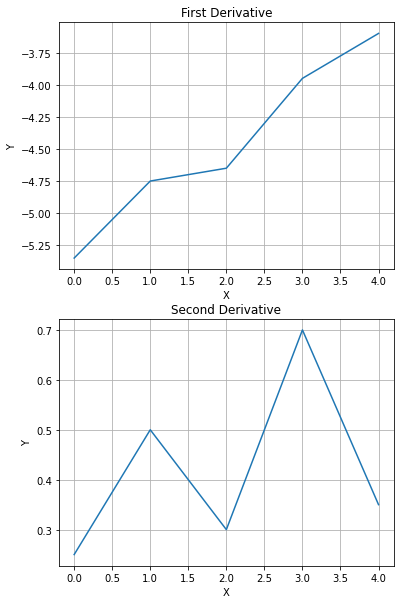

In [102]:
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([75, 69.9, 65.3, 61, 57.4])

h = x_data[1] - x_data[0]

# dy = taylor_order2(y_data[:-1], h) # OK
# dy = taylor_order4(y_data, h) # OK
dy = three_points(y_data, h) # OK
d2y = second_derivative(y_data, h) # OK

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)

ax1.title.set_text('First Derivative')
ax1.plot(x_data, dy)
ax1.grid(True)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax2.title.set_text('Second Derivative')
ax2.plot(x_data, d2y)
ax2.grid(True)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
plt.show()

### Practica Calificada 3, Pregunta 1
$$f'(x) = \frac{f(x+h)-f(x-h)}{2h}$$

In [144]:
N = 6
f = lambda x: round(np.sin(x), N)
df = lambda x: np.cos(x)
exact = df(0.2)

def central_derivative(f, x, h):
    return (f(x + h) - f(x - h))/(2*h)

for i in range(1, 6):
    h = 0.1**i
    derivative = round(central_derivative(f, 0.2, h), N)
    print(f"n={i} f'(x)={derivative} error={abs(exact - derivative)}")

n=1 f'(x)=0.978435 error=0.0016315778412415716
n=2 f'(x)=0.98005 error=1.6577841241649516e-05
n=3 f'(x)=0.98 error=6.657784124164401e-05
n=4 f'(x)=0.98 error=6.657784124164401e-05
n=5 f'(x)=0.95 error=0.03006657784124167
